<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Codealong Exploring SVMs Using Sklearn

_Authors: Joseph Nelson (DC)_

---

In [4]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Load the handwritten digits dataset.

In [5]:
# A:
digits = datasets.load_digits()
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [6]:
digits.DESCR

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [7]:
digits.data.shape

(1797, 64)

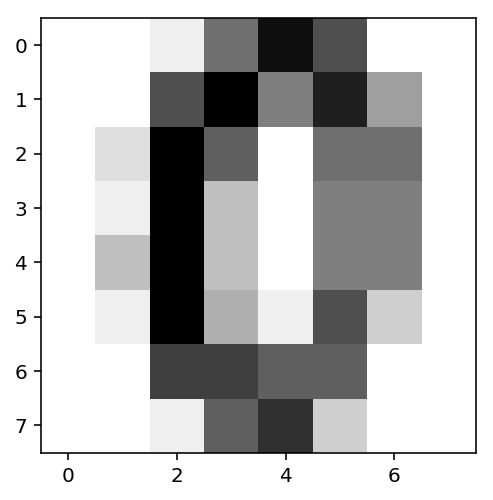

In [8]:
plt.imshow(digits.images[10], cmap=plt.cm.gray_r, interpolation='nearest')

In [9]:
digits.target[50]

2

In [10]:
digits_X, digits_y = digits.data, digits.target

In [11]:
# digits.images

In [12]:
#

### 2. Cross-validate a logistic regression on the data.

In [13]:
# A:
# C Value? 
logistic = linear_model.LogisticRegression()

#B. Defaults to Accuracy as score
cross_val_score(logistic, digits_X, digits_y, cv = 5).mean()

0.92101881133607011

### 3. Cross-validate a SVM on the data.

In [14]:
# A:
clf = svm.SVC()
print (cross_val_score(clf, digits_X, digits_y, cv =5).mean())

clf = svm.SVC(kernel='linear')
print (cross_val_score(clf, digits_X, digits_y, cv =5).mean())

0.448786800616
0.949334872621


## Gaussian SVM has two parameters, gamma and C

---

### gamma

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. 

The higher the value of gamma, the more it will try to exactly fit the training data set. Will cause over-fitting problem.
- small gamma: the model is constrained, can under-fit!  high bias and low variance.
- big gamma: Tries to capture the shape too well: can over-fit!  low bias and high variance.

<img src="http://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_15.png">



### C

Penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. C can be thought of as the parameter for the soft margin cost function, which controls the influence of each individual support vector

- small C: makes the decision surface smooth and simple, softer margin can under-fit! high bias and low variance.
- big C: selects more support vectors: can over-fit! harder margin. low bias and high variance.

<img src="http://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_18.png">


### 4. Fit an SVM modifying the default gamma and C.

In [15]:
# A:
clf = svm.SVC(gamma=0.0001, C= 200, kernel='poly')
print (cross_val_score(clf, digits_X, digits_y, cv =5).mean())

0.970487976538


### 5. Gridsearch an optimal gamma with C=1.

In [16]:
# A
from sklearn.model_selection import GridSearchCV

clf = svm.SVC(C=1)
gamma_range = np.logspace(-5, 2, 20)
param_grid = dict(gamma = gamma_range)

grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1)

grid.fit(digits_X, digits_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   46.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': array([  1.00000e-05,   2.33572e-05,   5.45559e-05,   1.27427e-04,
         2.97635e-04,   6.95193e-04,   1.62378e-03,   3.79269e-03,
         8.85867e-03,   2.06914e-02,   4.83293e-02,   1.12884e-01,
         2.63665e-01,   6.15848e-01,   1.43845e+00,   3.35982e+00,
         7.84760e+00,   1.83298e+01,   4.28133e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [17]:
accuracy = grid.cv_results_['mean_test_score']
gamma = [param['gamma'] for param in grid.cv_results_['params']]
gamma

[1.0000000000000001e-05,
 2.3357214690901213e-05,
 5.4555947811685143e-05,
 0.00012742749857031334,
 0.00029763514416313193,
 0.00069519279617756048,
 0.001623776739188721,
 0.0037926901907322499,
 0.0088586679041008226,
 0.02069138081114788,
 0.048329302385717518,
 0.11288378916846883,
 0.26366508987303555,
 0.6158482110660255,
 1.4384498882876631,
 3.3598182862837809,
 7.8475997035146072,
 18.329807108324339,
 42.813323987193868,
 100.0]

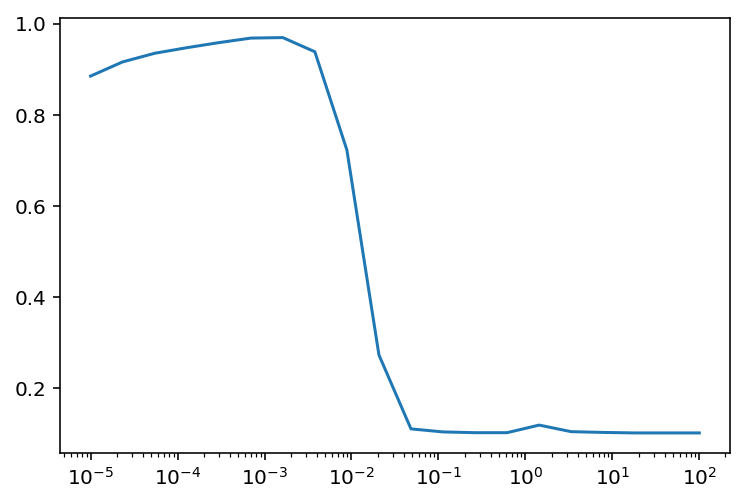

In [18]:
plt.semilogx(gamma, accuracy)

### 6. Gridsearch the optimal C, gamma, and kernel.

In [19]:
clf  = svm.SVC()

gamma_range = np.logspace(-5, 2, 20)
C_range = np.logspace(-3, 2, 10)
kernel_range = ['rbf', 'linear', 'poly']

param_grid = dict(gamma=gamma_range,
                  C=C_range,
                  kernel=kernel_range)

grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy',
                    verbose=1, n_jobs=-1)
grid.fit(digits_X, digits_y)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 897 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1347 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'gamma': array([  1.00000e-05,   2.33572e-05,   5.45559e-05,   1.27427e-04,
         2.97635e-04,   6.95193e-04,   1.62378e-03,   3.79269e-03,
         8.85867e-03,   2.06914e-02,   4.83293e-02,   1.12884e-01,
         2.63665e-01,   6.15848e-01,   1.43845e+00,   3.35982e+00,
         7....5443e+00,   7.74264e+00,
         2.78256e+01,   1.00000e+02]), 'kernel': ['rbf', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [20]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 7.7426368268112773, 'gamma': 0.00069519279617756048, 'kernel': 'rbf'}
0.974958263773


In [22]:
best_svm = grid.best_estimator_
best_svm

SVC(C=7.7426368268112773, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.00069519279617756048,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### 7. Import the iris dataset.

In [23]:
# A:
iris = datasets.load_iris()
iris_X = iris.data[:, :2]
iris_y = iris.target

### 8. Cross-validate a default logistic regression and default SVM on the iris data.

In [24]:
# Start with logistic Regression
logistic = linear_model.LogisticRegression()
print(cross_val_score(logistic, iris_X, iris_y, cv=5, scoring='accuracy').mean())


# Let's try a SVM
clf = svm.SVC()
print(cross_val_score(clf, iris_X, iris_y, cv=5, scoring='accuracy').mean())

0.766666666667
0.82


### 9. [Bonus] Compare three SVMs with different kernels on the iris data visually.
- Gaussian
- Linear
- Poly of degree 3

In [10]:
# A:

### 10. [Bonus] Compare SVM kernels visually on fake data using sklearn's `make_circles`.

Load `make_circles` from here:
```python
from sklearn.datasets import make_circles
```

Compare the linear, rbf, and poly kernels.

In [11]:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(circles_X[:,0], circles_X[:,1], c=circles_y)